In [8]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Load your DNS dataset
file_path = 'dns-log_test-data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Preprocessing: One-hot encode categorical columns
categorical_columns = ['protocol', 'resolved_address', 'class', 'query_type', 'response', 'rejected']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_features)

# Add DBSCAN cluster labels to the DataFrame
df['cluster'] = labels

# Identify anomalies (noise points labeled as -1)
df['anomaly'] = (df['cluster'] == -1).astype(int)  # 1 for anomalies, 0 for normal

# Analyze results
num_anomalies = df['anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")
print(f"Total rows: {len(df)}")
print("\nSample anomalies:")
print(df[df['anomaly'] == 1].head())

# Save the results to a new CSV file
#df.to_csv('dns_with_anomalies.csv', index=False)


Number of anomalies detected: 3632
Total rows: 27935

Sample anomalies:
   protocol             resolved_address       class query_type  response  \
1       udp  _xmpp-client._tcp.gmail.com  C_INTERNET        SRV  NXDOMAIN   
11      udp           www.metasploit.com  C_INTERNET       AAAA  NXDOMAIN   
12      udp           www.metasploit.com  C_INTERNET          A  NXDOMAIN   
14      udp       _xmppconnect.gmail.com  C_INTERNET        TXT  NXDOMAIN   
15      udp                    gmail.com  C_INTERNET          A  NXDOMAIN   

   rejected  cluster  anomaly  
1         F       -1        1  
11        F       -1        1  
12        F       -1        1  
14        F       -1        1  
15        F       -1        1  


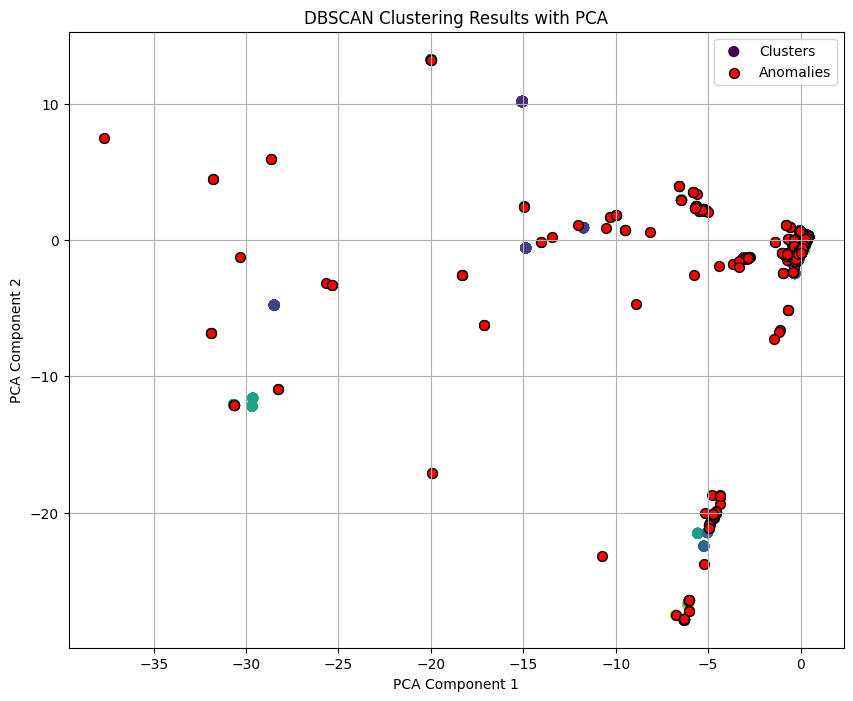

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Separate normal points and anomalies
normal_points = df[df['cluster'] != -1]
anomalies = df[df['cluster'] == -1]

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(normal_points['pca_1'], normal_points['pca_2'], 
            c=normal_points['cluster'], cmap='viridis', s=50, label='Clusters')
plt.scatter(anomalies['pca_1'], anomalies['pca_2'], 
            c='red', label='Anomalies', s=50, edgecolor='k')

plt.title('DBSCAN Clustering Results with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()
